In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import jax.numpy as np
import jax
import networkx as nx
import matplotlib.pyplot as plt
from src import ComputationalHypergraphDiscovery as CHD
from scipy.integrate import solve_ivp

We consider the example taken from [Modeling with ODE](https://people.tamu.edu/~phoward//m412/modode.pdf). The proposed mechanism for the hydrogenation of ethylene $(\text{C}_2 \text{H}_4)$ to ethane $(\text{C}_2 \text{H}_6)$, is (writing $[H]$ for the concentration of $H$)  modeled by the following system of differential equations:
\begin{split}
\frac{d[H_2]}{dt}&=-k_1[H_2]+k_{-1}[H]^2\\
\frac{d[H]}{dt}&=2k_1[H_2]-2k_{-1}[H]^2-k_2 [C_2H_4][H]-k_3[C_2H_5][H]\\
\frac{d[C_2H_4]}{dt}&=-k_2 [C_2H_4][H]\\
\frac{d[C_2H_5]}{dt}&=k_2 [C_2H_4][H]-k_3[C_2H_5][H]
\end{split}

In [4]:
def F(t, X): #all k = 1
    H_2, H, C2H4, C2H5 = X
    u = - H_2 + H**2
    d = 2*H_2 - 2*H**2 - C2H4*H - C2H5*H 
    t = -C2H4*H
    q = C2H4*H - C2H5*H
    return u, d, t, q


def build_dataset(n_init_cond = 50, t_f = 5, n_times_per_cond = 50):
    l = np.zeros((n_init_cond*n_times_per_cond,8))
    for i in range(n_init_cond):
        key=jax.random.PRNGKey(i)
        sol = solve_ivp(F,(0,t_f), jax.random.uniform(key,shape=(4,)), t_eval = np.linspace(0,t_f,n_times_per_cond))
        derivatives = np.array([F(None, i) for i in sol.y.T])
        l=l.at[i*n_times_per_cond:(i+1)*n_times_per_cond].set(np.hstack([sol.y.T, derivatives]))
    return l



In [5]:
X = np.array(build_dataset())
names=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$',
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000gn/T/ipykernel_50889/915193373.py:7: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000gn/T/ipykernel_50889/915193373.py:8: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH$',
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000gn/T/ipykernel_50889/915193373.py:9: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_4$',
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000gn/T/ipykernel_50889/915193373.py:10: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tC_2H_5$'


In [6]:
X_train=X[:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]

# No prior information

In [7]:

graph_discovery = CHD.GraphDiscovery(X=X_train,names=names,normalize=True)

Finding ancestors with kernel [linear]: 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]



Results for $\partial_tH_2$
Kernel [linear] has n/(n+s)=5.69678998599265e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=8.317885441875864e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0030527605362257303, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tH_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


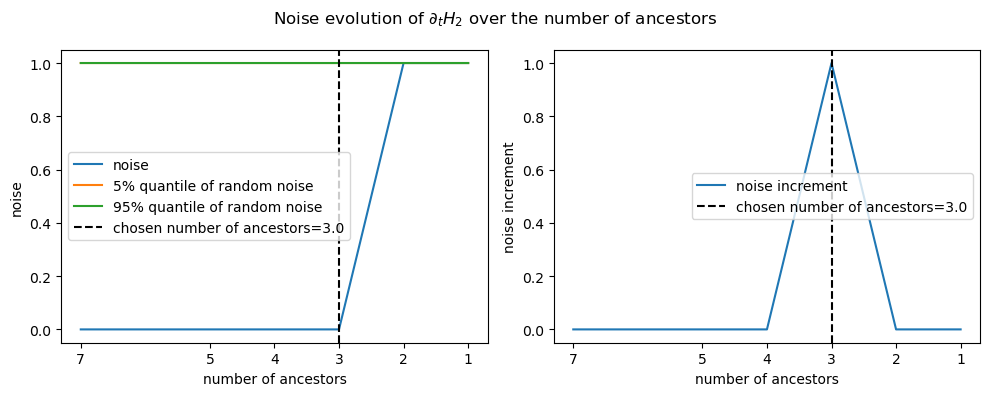

Ancestors of $\partial_tH_2$: ['$\\partial_tH$', '$\\partial_tC_2H_4$', '$\\partial_tC_2H_5$']


Results for $\partial_tH$
Kernel [linear] has n/(n+s)=3.130994481494295e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=7.493504492947996e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0015486922286616505, Z=(0.96, 0.97), gamma=1.00e-09
$\partial_tH$ has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


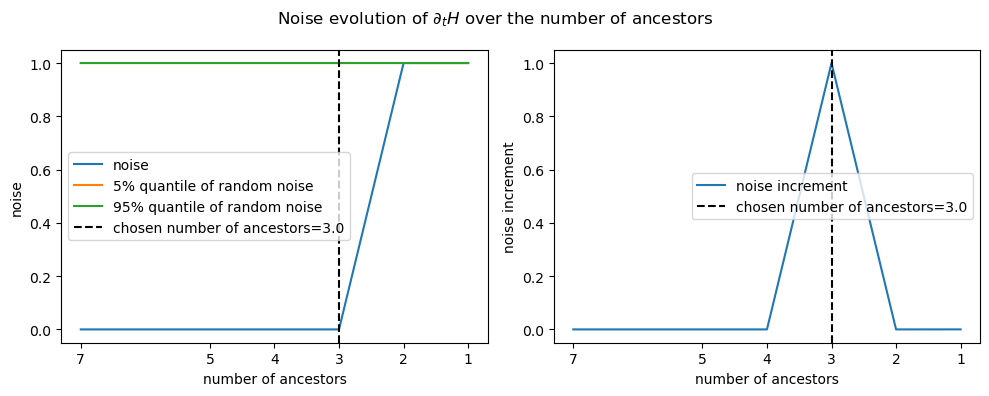

Ancestors of $\partial_tH$: ['$\\partial_tH_2$', '$\\partial_tC_2H_4$', '$\\partial_tC_2H_5$']


Results for $\partial_tC_2H_4$
Kernel [linear] has n/(n+s)=6.587066782815413e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.0424615286393754e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.005136700513089463, Z=(0.96, 0.97), gamma=1.00e-09
$\partial_tC_2H_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.00 after pruning)


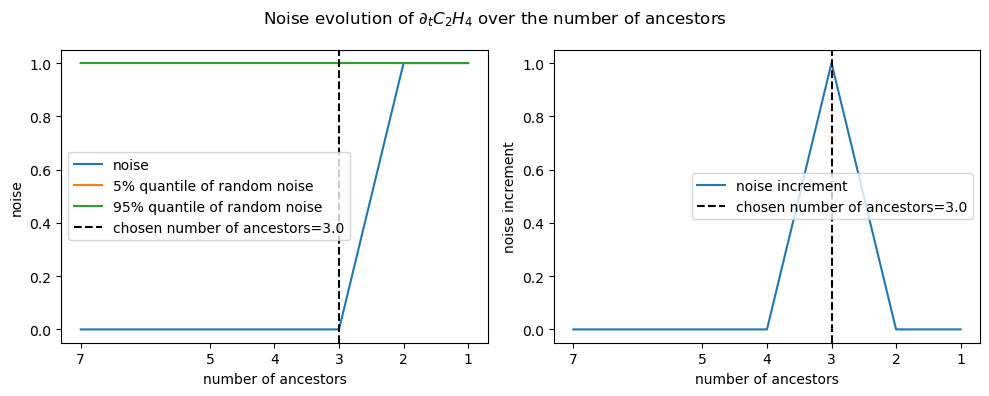

Ancestors of $\partial_tC_2H_4$: ['$\\partial_tH_2$', '$\\partial_tH$', '$\\partial_tC_2H_5$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]



Results for $H_2$
Kernel [linear] has n/(n+s)=0.718482280206157, Z=(1.00, 1.00), gamma=7.41e+01
Kernel [quadratic] has n/(n+s)=3.968911277548237e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.004851682720863319, Z=(0.97, 0.98), gamma=1.00e-09
$H_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


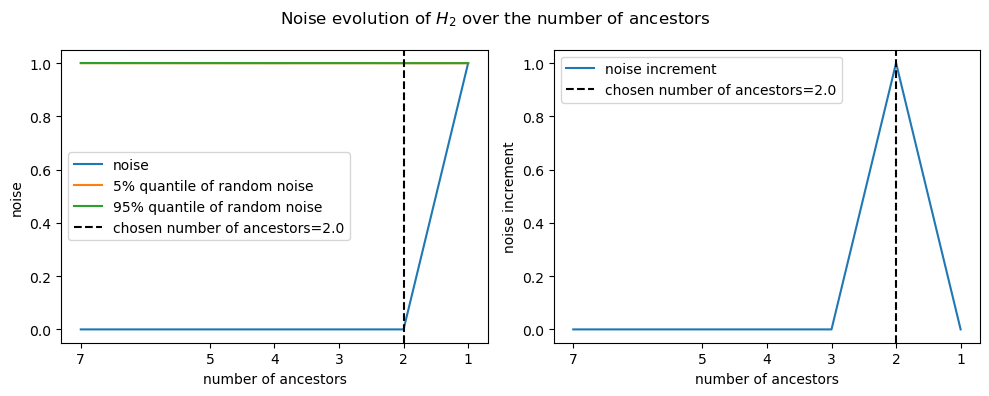

Ancestors of $H_2$: ['$H$', '$\\partial_tH_2$']


Results for $\partial_tC_2H_5$
Kernel [linear] has n/(n+s)=2.8953033206691462e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [quadratic] has n/(n+s)=1.2919160374043501e-11, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.0045954894190261344, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tC_2H_5$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


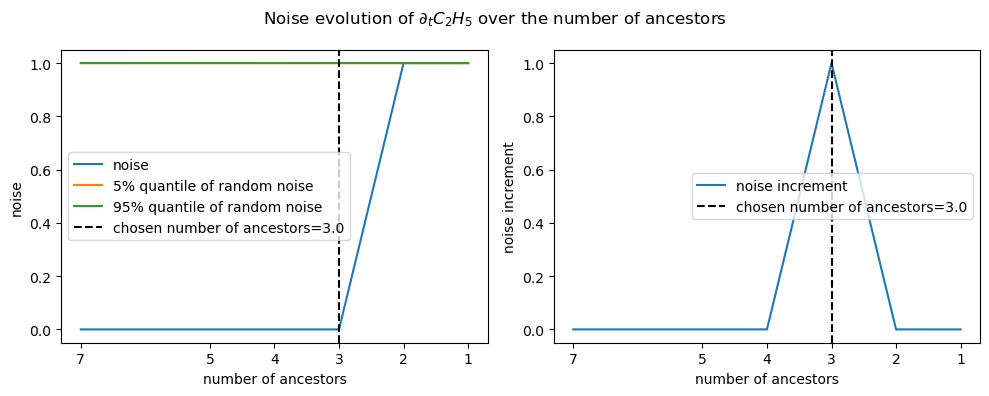

Ancestors of $\partial_tC_2H_5$: ['$H$', '$C_2H_4$', '$C_2H_5$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]


Results for $H$
Kernel [linear] has n/(n+s)=0.660632472782137, Z=(1.00, 1.00), gamma=8.41e+01
Kernel [quadratic] has n/(n+s)=0.5778702309619276, Z=(1.00, 1.00), gamma=1.60e+00
Kernel [gaussian] has n/(n+s)=0.13564470041882432, Z=(0.97, 0.98), gamma=1.00e-09
$H$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.16 after pruning)


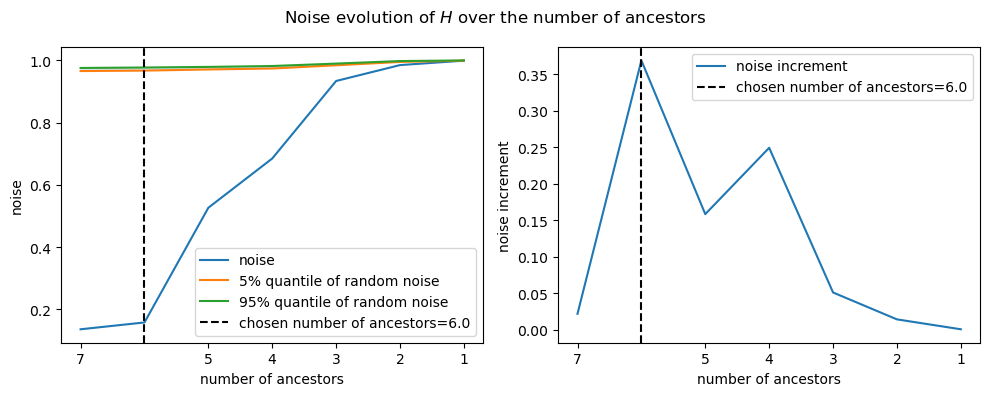

Ancestors of $H$: ['$H_2$', '$C_2H_4$', '$C_2H_5$', '$\\partial_tH$', '$\\partial_tC_2H_4$', '$\\partial_tC_2H_5$']


Results for $C_2H_4$
Kernel [linear] has n/(n+s)=0.7706997363663267, Z=(1.00, 1.00), gamma=2.86e+02
Kernel [quadratic] has n/(n+s)=0.581943476291232, Z=(1.00, 1.00), gamma=2.31e+01
Kernel [gaussian] has n/(n+s)=0.3406149306618791, Z=(0.97, 0.98), gamma=1.00e-09
$C_2H_4$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.39 after pruning)


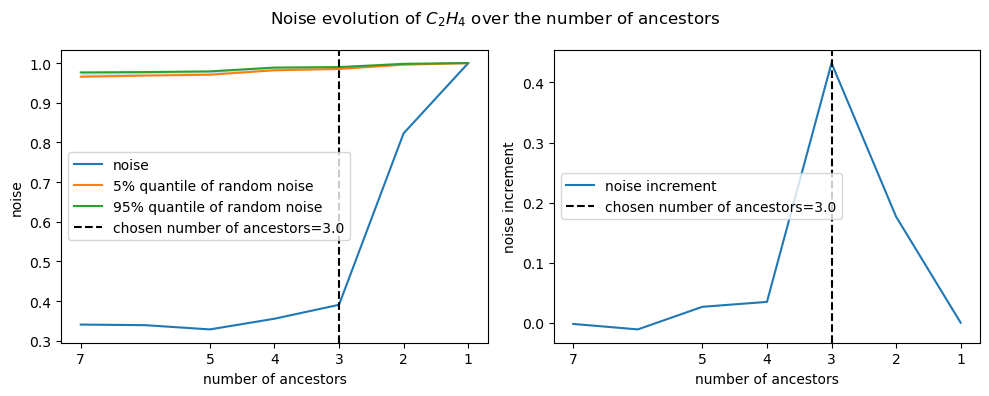

Ancestors of $C_2H_4$: ['$H$', '$C_2H_5$', '$\\partial_tC_2H_4$']


Results for $C_2H_5$
Kernel [linear] has n/(n+s)=0.6885644503255942, Z=(1.00, 1.00), gamma=2.41e+02
Kernel [quadratic] has n/(n+s)=0.5015126257273985, Z=(1.00, 1.00), gamma=2.62e+01
Kernel [gaussian] has n/(n+s)=0.39007607764929425, Z=(0.97, 0.98), gamma=1.00e-09
$C_2H_5$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.43 after pruning)


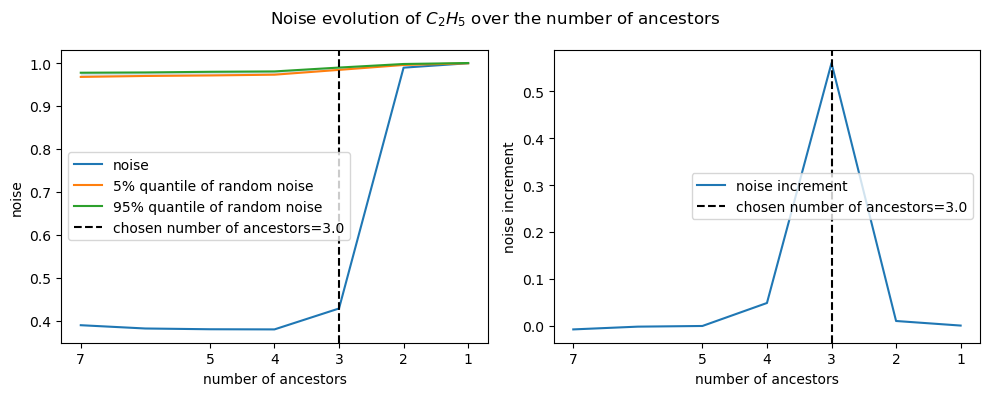

Ancestors of $C_2H_5$: ['$H$', '$C_2H_4$', '$\\partial_tC_2H_5$']



In [8]:

graph_discovery.fit()

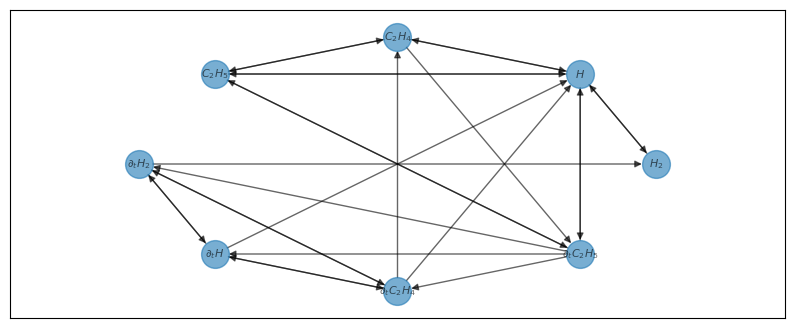

In [10]:
graph_discovery.plot_graph()

In [11]:

def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

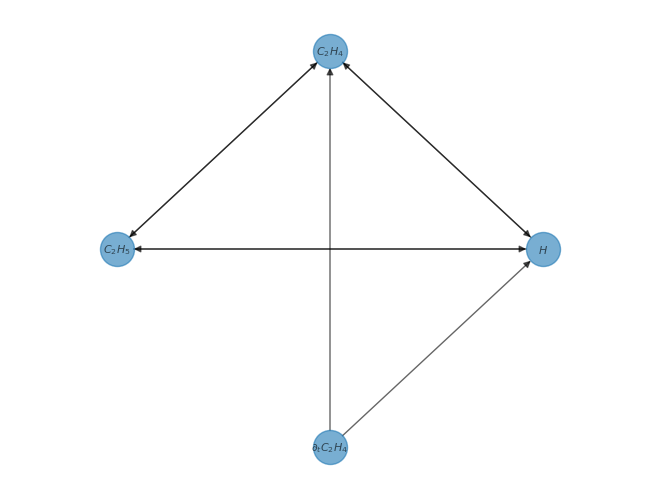

In [12]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'$C_2H_4$',undirected=False,radius=1).reverse(),type_label=True)

# Using prior information of Bipartite graph

In [13]:
names=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$',
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]

not_free=[
    '$\partial_tH_2$',
    '$\partial_tH$',
    '$\partial_tC_2H_4$',
    '$\partial_tC_2H_5$'
]
free=[
    '$H_2$',
    '$H$',
    '$C_2H_4$',
    '$C_2H_5$'
]
possible_edges=nx.DiGraph()
for f_node in free:
    for nf_node in not_free:
        possible_edges.add_edge(f_node,nf_node)
        possible_edges.add_edge(nf_node,f_node)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000gn/T/ipykernel_50889/1028034438.py:6: SyntaxWarning: invalid escape sequence '\p'
  '$\partial_tH_2$',
/var/folders/98/lrrs104n4c145tzkzk46s7vh0000g

Converting possible edges to dense adjacency matrix


Finding ancestors with kernel [quadratic]:  67%|██████▋   | 4/6 [00:07<00:03,  1.80s/it]



Results for $\partial_tH_2$
Kernel [linear] has n/(n+s)=0.5918784952945809, Z=(1.00, 1.00), gamma=3.20e+02
Kernel [quadratic] has n/(n+s)=5.14292064493036e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.00264532737656173, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tH_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


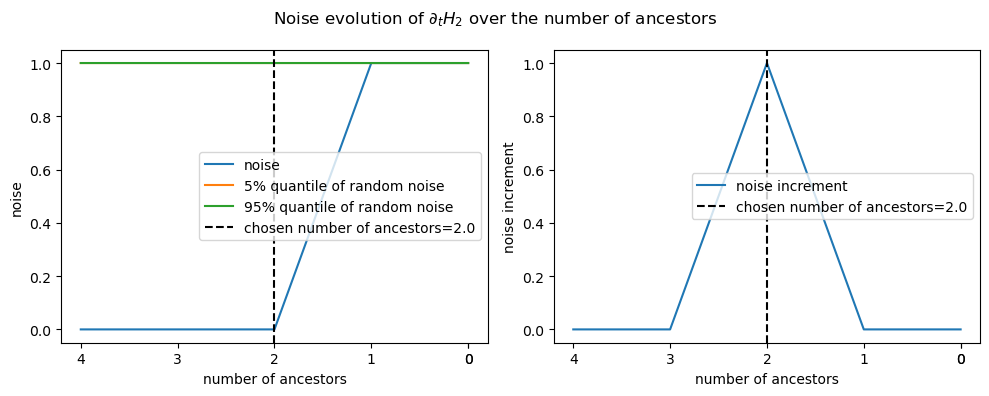

Ancestors of $\partial_tH_2$: ['$H_2$', '$H$']


Results for $\partial_tH$
Kernel [linear] has n/(n+s)=0.6069095489708579, Z=(1.00, 1.00), gamma=4.16e+02
Kernel [quadratic] has n/(n+s)=5.144297629968723e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.002275765883455328, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tH$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


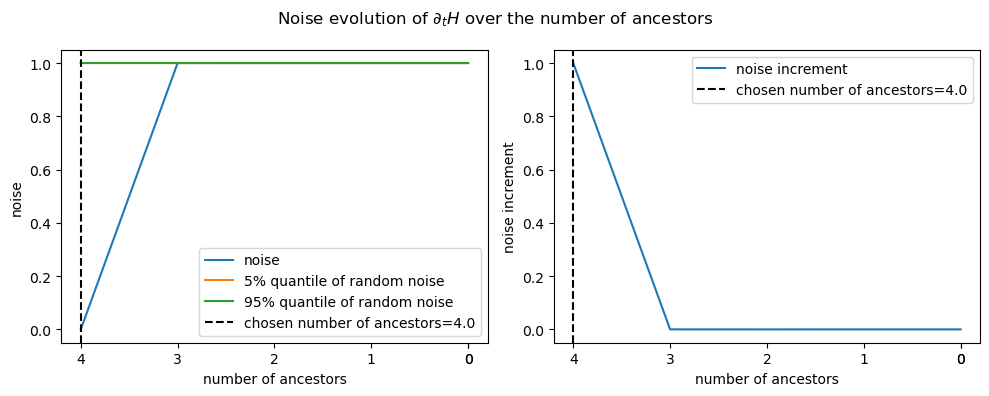

Ancestors of $\partial_tH$: ['$H_2$', '$H$', '$C_2H_4$', '$C_2H_5$']


Results for $\partial_tC_2H_4$
Kernel [linear] has n/(n+s)=0.7462211125680843, Z=(1.00, 1.00), gamma=3.45e+02
Kernel [quadratic] has n/(n+s)=1.3542717277075272e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.001984929726065888, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tC_2H_4$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


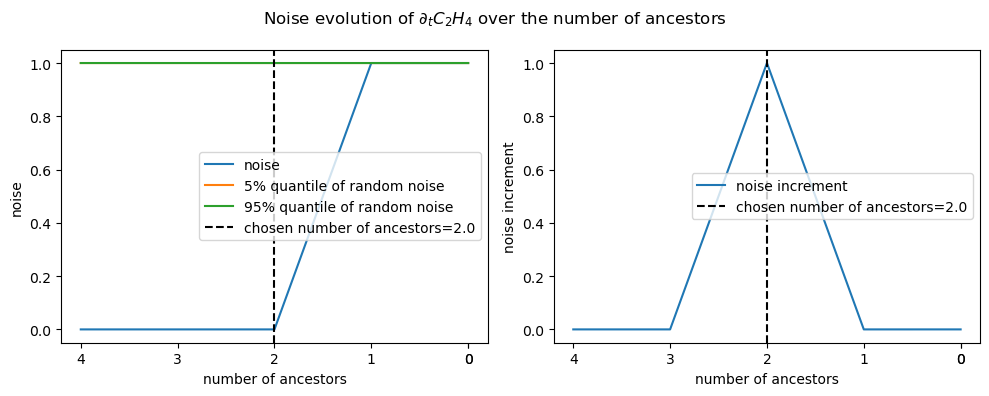

Ancestors of $\partial_tC_2H_4$: ['$H$', '$C_2H_4$']


Results for $\partial_tC_2H_5$
Kernel [linear] has n/(n+s)=0.653699370260191, Z=(1.00, 1.00), gamma=4.83e+02
Kernel [quadratic] has n/(n+s)=3.171780071303801e-12, Z=(1.00, 1.00), gamma=1.00e-09
Kernel [gaussian] has n/(n+s)=0.002059236499171046, Z=(0.97, 0.98), gamma=1.00e-09
$\partial_tC_2H_5$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.00 after pruning)


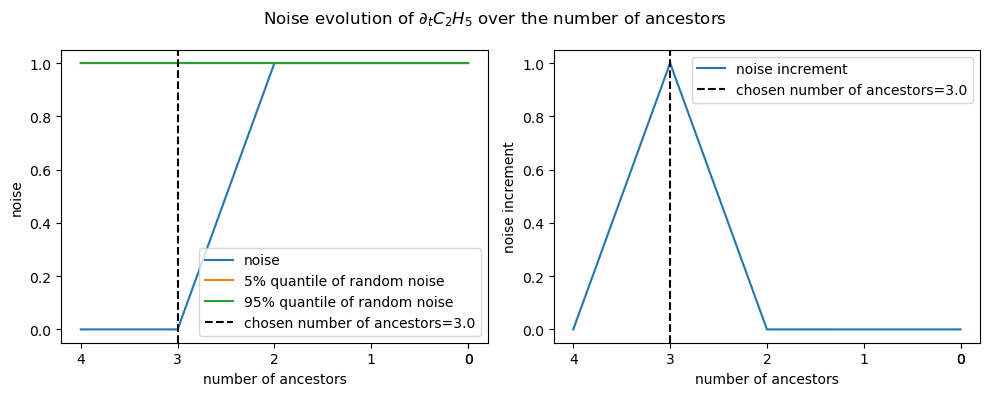

Ancestors of $\partial_tC_2H_5$: ['$H$', '$C_2H_4$', '$C_2H_5$']



In [14]:


def acceptation_logic(noise,Z,which):
    if noise<0.5:
        return True
    return False
graph_discovery = CHD.GraphDiscovery(X=X,names=names,possible_edges=possible_edges,normalize=True)
graph_discovery.fit(targets=not_free)

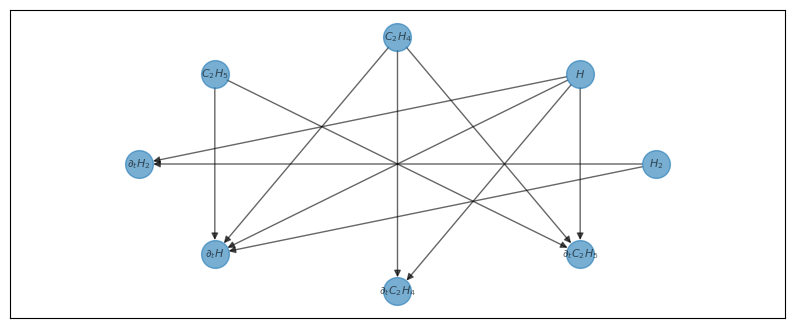

In [15]:
graph_discovery.plot_graph(False)